In [1]:
from pathlib import Path
#import scanpy as sc
#import cell2location
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

DPI = 300
FONTSIZE = 20  # 42
#sc.settings.set_figure_params(
    #scanpy=True, dpi=100, transparent=True, vector_friendly=True, dpi_save=DPI
#)
from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42

#from vistools import utils

import scikit_posthocs

import seaborn as sns
custom_params = {"font.size": FONTSIZE, "figure.dpi": 100, "savefig.dpi": DPI}
sns.set_theme(style="ticks", rc=custom_params)


In [2]:
SAMPLE_NAME = "concat_withWu2022"
optimal_s = 1.2 #1.2  # 1 1.2 1.5 2

In [3]:
# store results
DIR2SAVE = Path(
    f"/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/cell2loc_spatialde2/{SAMPLE_NAME}"
)  # to change
DIR2SAVE.mkdir(parents=True, exist_ok=True)

In [4]:
# figures
FIG2SAVE = DIR2SAVE.joinpath("figures/")
FIG2SAVE.mkdir(parents=True, exist_ok=True)

In [5]:
df = pd.read_csv(DIR2SAVE.joinpath('cell2loc_cell_abundance_microenvs.csv'),
                 sep='\t',
                 header=0,
                 index_col=0
                )

In [6]:
df

,B,C1QC Mac,C3 iCAF,CD4 Tfh,CD4 Th,CD4 Th HSP,CD4 Th17,CD4 Tn,CD8 Tem,CD8 Tem GZMB,...,UPR,cDC1,cDC2,gdT,iREC,migDC,pDC,REC,segmentation_labels,Sample
spot_id,,,,,,,,,,,,,,,,,,,,,
CRC08_LM_VISIUM_AAACAAGTATCTCCCA-1,0.000598,0.000064,0.000022,0.000365,0.000811,0.001681,0.001619,0.000898,0.000907,0.000488,...,0.012999,0.000056,0.000060,0.000401,0.001272,0.000069,0.000206,0.001876,4,CRC08_LM_VISIUM
CRC08_LM_VISIUM_AAACCGGAAATGTTAA-1,0.001441,0.000154,0.000230,0.000748,0.001416,0.001042,0.001674,0.001143,0.001382,0.001960,...,0.007303,0.000086,0.000112,0.001037,0.308789,0.000355,0.000295,0.334837,7,CRC08_LM_VISIUM
CRC08_LM_VISIUM_AAACCGTTCGTCCAGG-1,0.000523,0.000012,0.000092,0.000928,0.000643,0.000923,0.000954,0.000413,0.000868,0.000966,...,0.004257,0.000120,0.000030,0.000913,0.004188,0.000205,0.004973,0.000836,8,CRC08_LM_VISIUM
CRC08_LM_VISIUM_AAACCTAAGCAGCCGG-1,0.000121,0.000042,0.000030,0.000207,0.000356,0.000848,0.000197,0.000366,0.000357,0.000496,...,0.000472,0.000011,0.000011,0.000375,0.001547,0.000056,0.000033,2.112080,7,CRC08_LM_VISIUM
CRC08_LM_VISIUM_AAACGAGACGGTTGAT-1,0.001991,0.000158,0.000912,0.002296,0.002224,0.002558,0.003562,0.004195,0.002283,0.002148,...,0.007449,0.000241,0.000344,0.002107,0.134352,0.000367,0.000415,0.192628,4,CRC08_LM_VISIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ST_LM_4_TTGTTGTGTGTCAAGA-1,0.000969,0.000169,0.000133,0.000589,0.000664,0.001596,0.000748,0.000670,0.000911,0.000945,...,0.010535,0.000135,0.000107,0.000973,0.055422,0.000195,0.000137,0.009039,7,ST_LM_4
ST_LM_4_TTGTTTCACATCCAGG-1,0.000747,0.011145,0.314606,0.000970,0.001147,0.001217,0.001650,0.001089,0.001207,0.001609,...,0.001103,0.000098,0.000293,0.001586,0.001324,0.000196,0.000413,0.002929,9,ST_LM_4
ST_LM_4_TTGTTTCATTAGTCTA-1,0.000319,0.002629,0.286931,0.000438,0.000617,0.000612,0.001037,0.000467,0.000579,0.000703,...,0.000128,0.000104,0.000180,0.000824,0.000079,0.000165,0.000308,0.000506,9,ST_LM_4


In [7]:
df_melt = pd.melt(df.reset_index(), 
                             id_vars=['spot_id', 'Sample', 'segmentation_labels'], 
                             value_vars=['REC', 'iREC', 'Stem', 'Stem NOTUM',
                                         'Myofibroblast', 'ECM CAF', 'Pericyte', 'SPP1 Mac', 'Neutrophil',
                                         'Treg', 'CD8 Tex', 'IL1B Mac', 'NLRP3 Mac'
                                        ],
                             var_name='Celltype', 
                             value_name='Cell abundance')

In [8]:
df_melt

,spot_id,Sample,segmentation_labels,Celltype,Cell abundance
0,CRC08_LM_VISIUM_AAACAAGTATCTCCCA-1,CRC08_LM_VISIUM,4,REC,0.001876
1,CRC08_LM_VISIUM_AAACCGGAAATGTTAA-1,CRC08_LM_VISIUM,7,REC,0.334837
2,CRC08_LM_VISIUM_AAACCGTTCGTCCAGG-1,CRC08_LM_VISIUM,8,REC,0.000836
3,CRC08_LM_VISIUM_AAACCTAAGCAGCCGG-1,CRC08_LM_VISIUM,7,REC,2.112080
4,CRC08_LM_VISIUM_AAACGAGACGGTTGAT-1,CRC08_LM_VISIUM,4,REC,0.192628
...,...,...,...,...,...
209399,ST_LM_4_TTGTTGTGTGTCAAGA-1,ST_LM_4,7,NLRP3 Mac,0.000235
209400,ST_LM_4_TTGTTTCACATCCAGG-1,ST_LM_4,9,NLRP3 Mac,0.000675
209401,ST_LM_4_TTGTTTCATTAGTCTA-1,ST_LM_4,9,NLRP3 Mac,0.000199
209402,ST_LM_4_TTGTTTCCATACAACT-1,ST_LM_4,3,NLRP3 Mac,0.012360


In [9]:
palette = [
    "#fdb462", #0
    "#FCCDE5", #1
    "#FB8072", #2
    "#e78ac3", #3
    "#67A9CF", #4
    "#feed8b", #5
    "#1f78b4", #6
    "#91CF60", #7 
    "#b3ffff", #8 
    "#33a02c" #9
] 

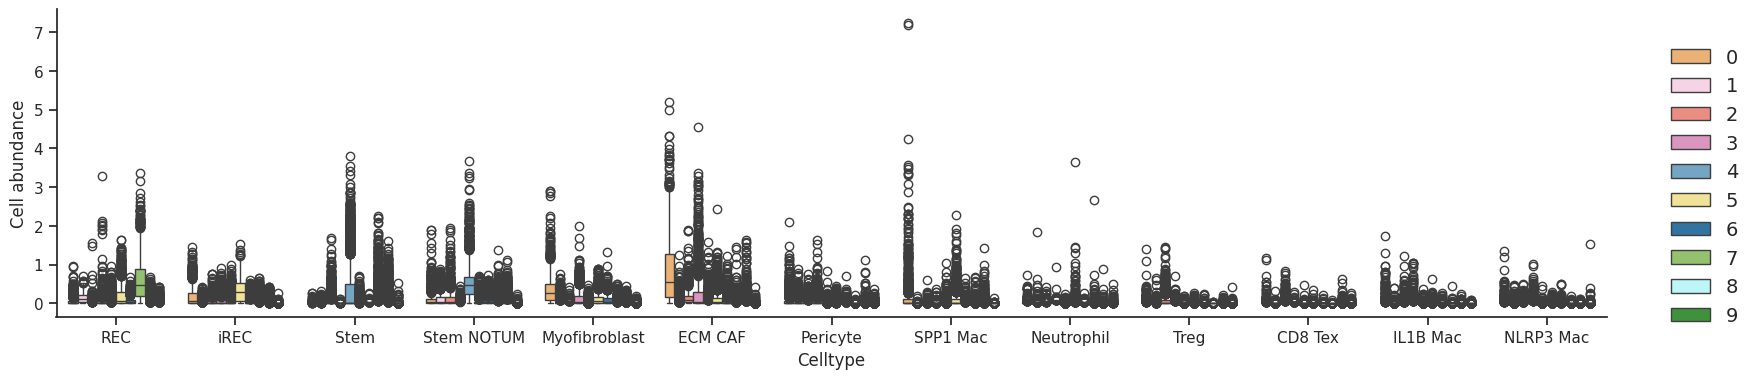

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,4))
sns.boxplot(data=df_melt,
            x="Celltype", 
            y="Cell abundance", 
            hue="segmentation_labels",
            palette=palette,
            ax=ax,
            #flierprops={"marker": "o", "markerfacecolor": "None"}
           )
ax.legend(
          bbox_to_anchor=(1.09, 0.9), 
          loc='upper right',
          fontsize=14,
          facecolor="white",
          edgecolor="white",
          ncol=1,
          borderaxespad=0.0,
          framealpha=0,
          frameon=False,
         )
sns.despine()
plt.savefig(FIG2SAVE.joinpath("Boxplot_cell_abundance_cellular_neighbourhoods.pdf"), 
            dpi=DPI, format="pdf", 
            bbox_inches="tight")
plt.show()

-- REC


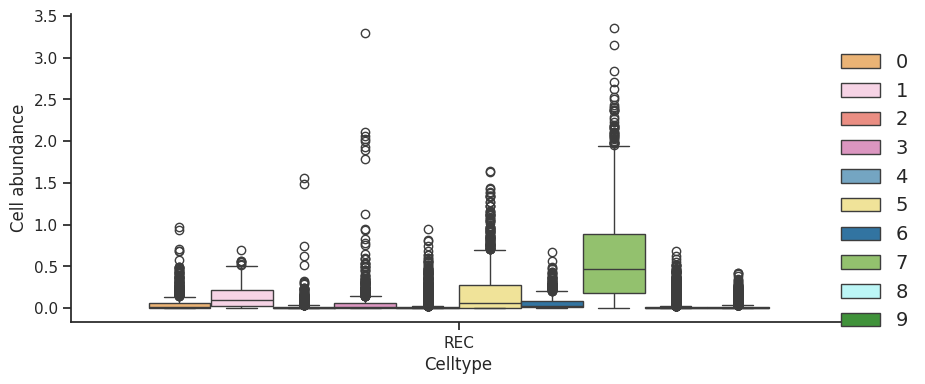

-- iREC


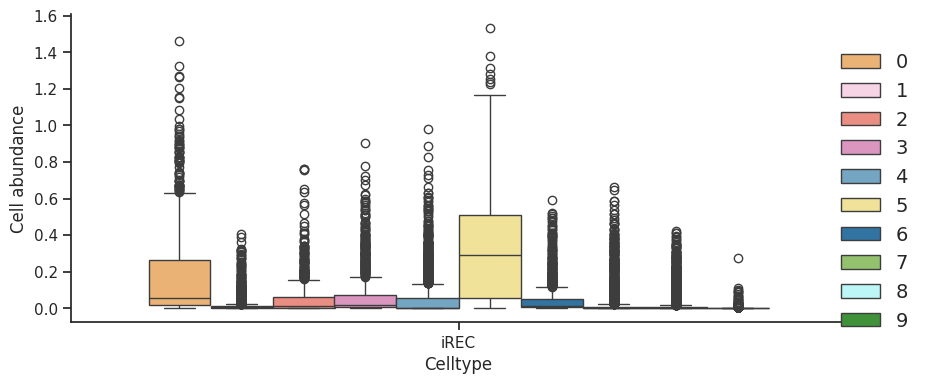

-- Stem


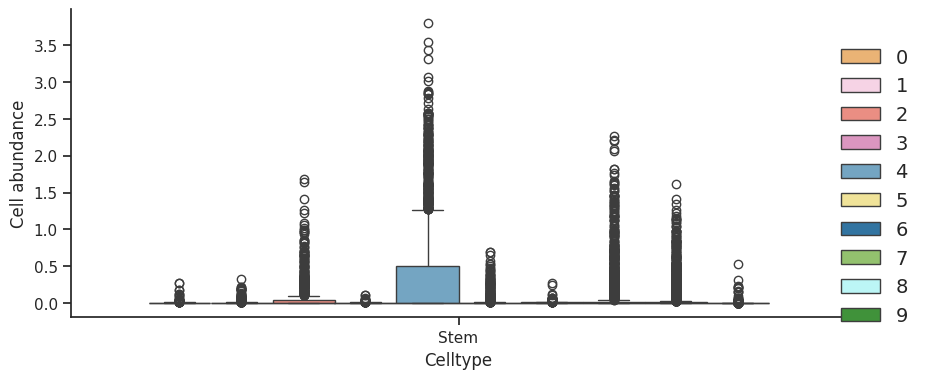

-- Stem NOTUM


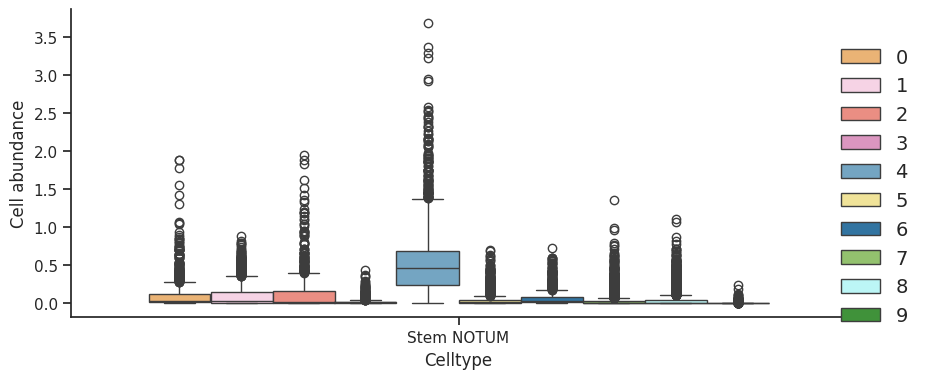

-- Myofibroblast


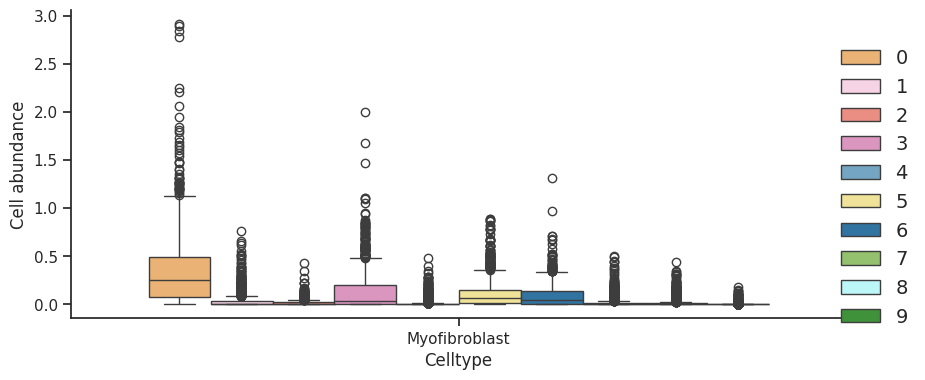

-- ECM CAF


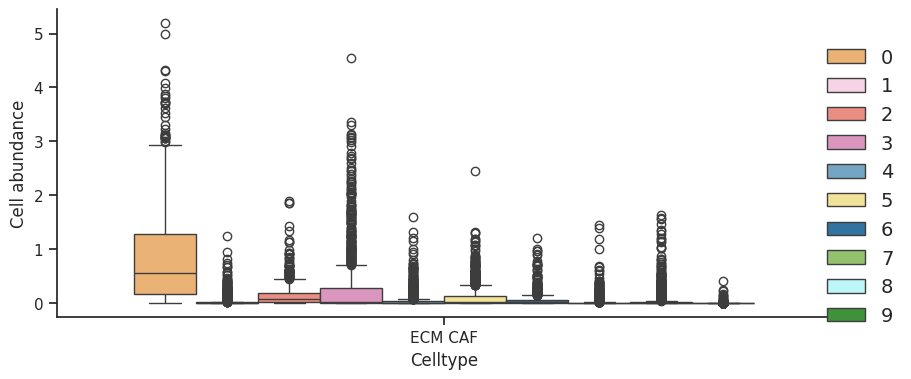

-- Pericyte


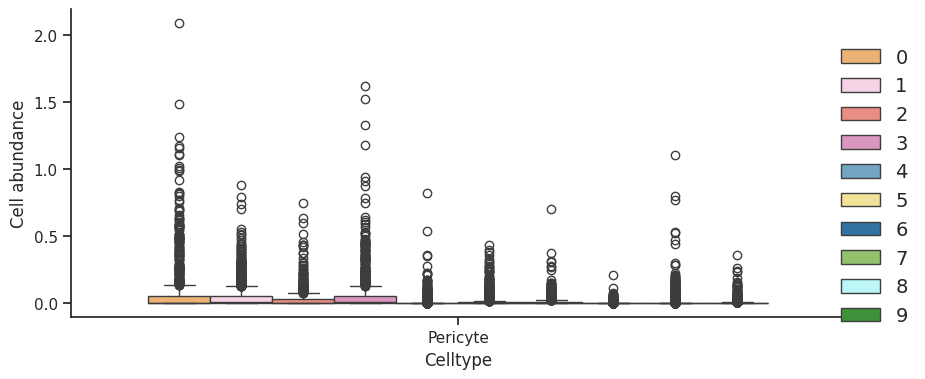

-- SPP1 Mac


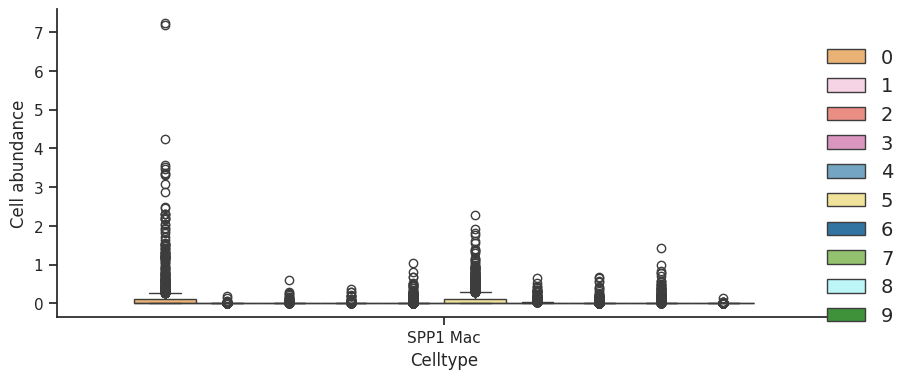

-- Neutrophil


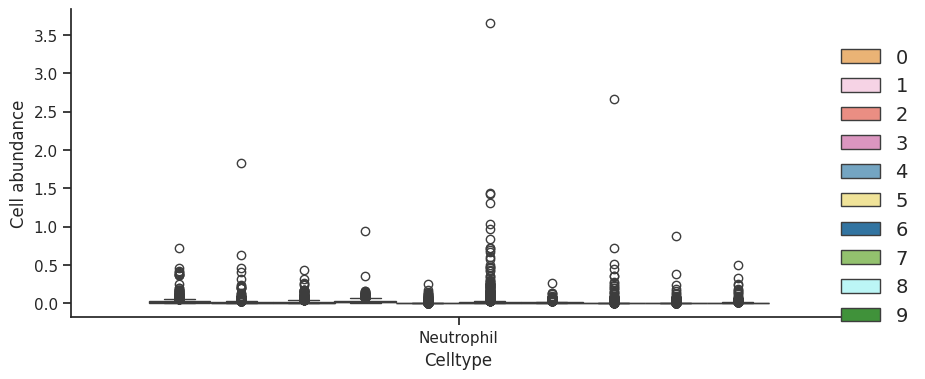

-- Treg


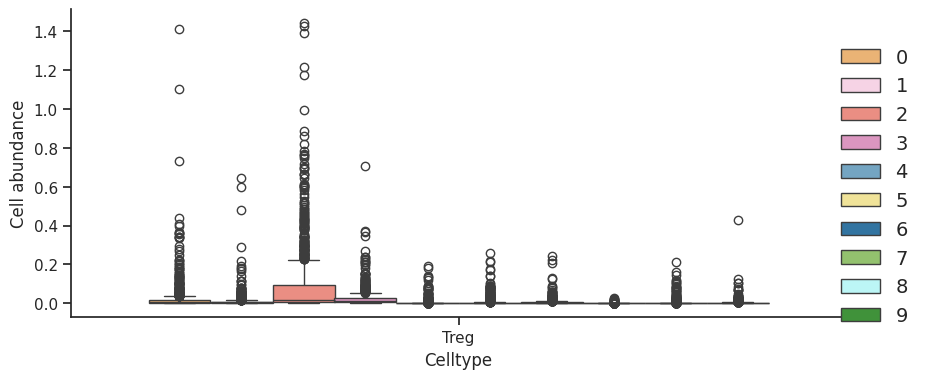

-- CD8 Tex


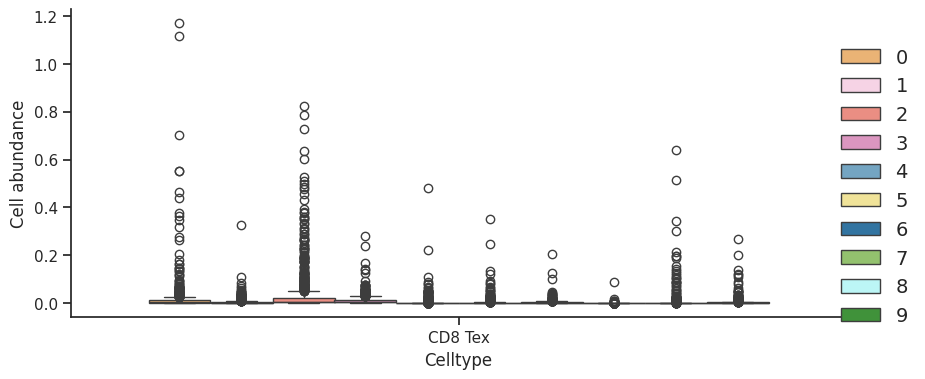

-- IL1B Mac


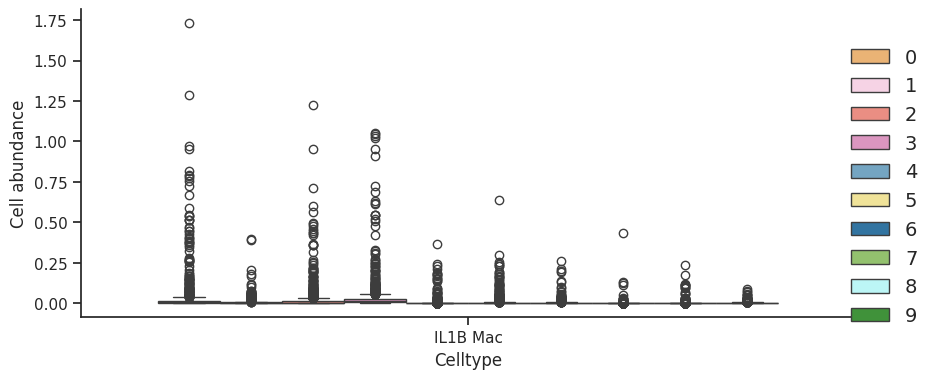

-- NLRP3 Mac


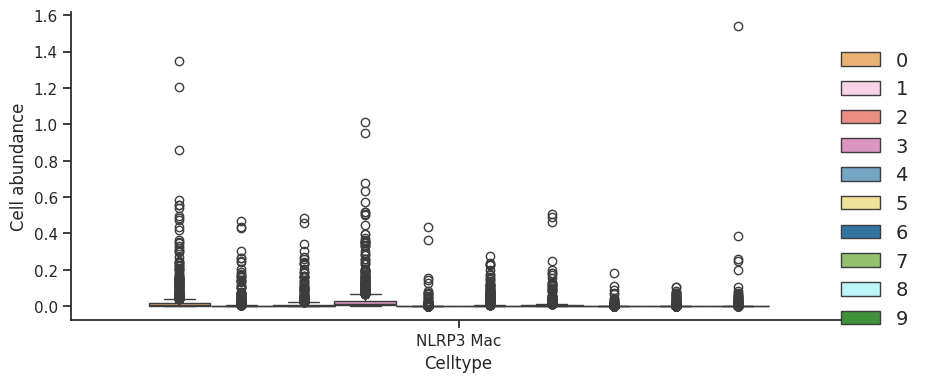

In [11]:
#c2p = 'iREC'
for c2p in df_melt['Celltype'].unique():
    print("--", c2p)
    df_melt_c2p = df_melt[df_melt['Celltype']==c2p].copy()
    df_melt_c2p.segmentation_labels = df_melt_c2p.segmentation_labels.astype('int').astype('category')

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
    sns.boxplot(data=df_melt_c2p,
                x="Celltype", 
                y="Cell abundance", 
                hue="segmentation_labels",
                palette=palette,
                ax=ax,
                #flierprops={"marker": "o", "markerfacecolor": "None"}
               )
    ax.legend(
              bbox_to_anchor=(1.09, 0.9), 
              loc='upper right',
              fontsize=14,
              facecolor="white",
              edgecolor="white",
              ncol=1,
              borderaxespad=0.0,
              framealpha=0,
              frameon=False,
             )
    sns.despine()
    plt.savefig(FIG2SAVE.joinpath(f"Boxplot_cell_abundance_cellular_neighbourhoods_{c2p}.pdf"), 
                dpi=DPI, format="pdf", 
                bbox_inches="tight")
    plt.show()

In [12]:
# subset to certain microenvironments:
df_melt_subset = df_melt[df_melt['segmentation_labels'].isin([0, 4, 5, 7])].copy() # 7# remove 2 potentially

In [13]:
df_melt_subset.segmentation_labels = df_melt_subset.segmentation_labels.astype('int').astype('category')

In [14]:
palette_subset = [
    "#fdb462", #0
    "#67A9CF", #4
    "#feed8b", #5
    "#91CF60", #7 
] 

### Statistical test of significance

1. lets's do Kruskal-Wallis
2. As follow up- Post-hoc test: Dunn
Multiple hypothesis correction was used in the post-hoc Dunn test


In [15]:
#### First iREC vs stem (environments 0,5,4)

-- REC


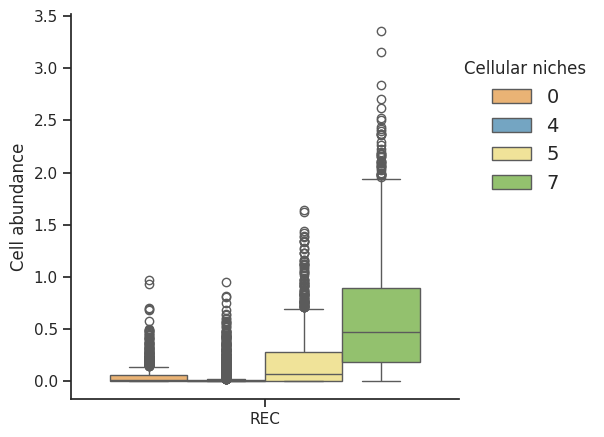

2645.721068734998 0.0
-- iREC


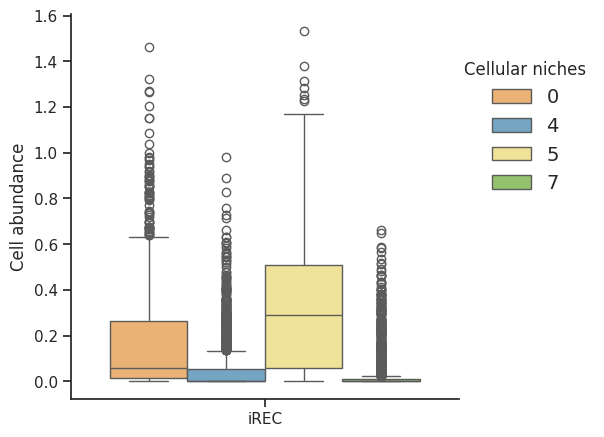

2261.924771864371 0.0
-- Stem


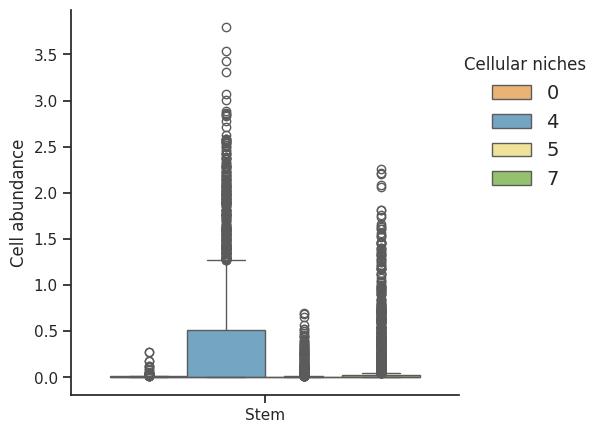

271.36296927504736 1.5652616450995965e-58
-- Stem NOTUM


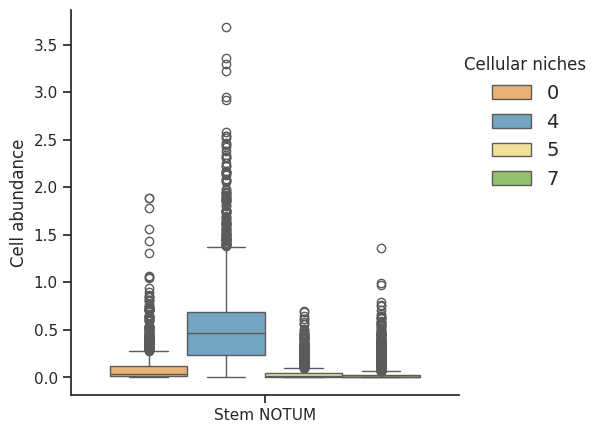

2452.0681152615107 0.0
-- Myofibroblast


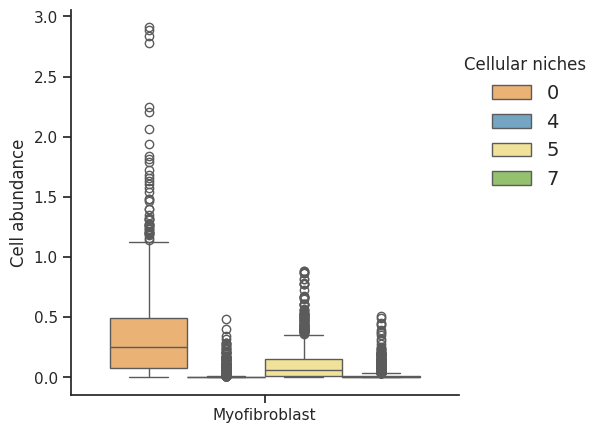

2768.9936648600487 0.0
-- ECM CAF


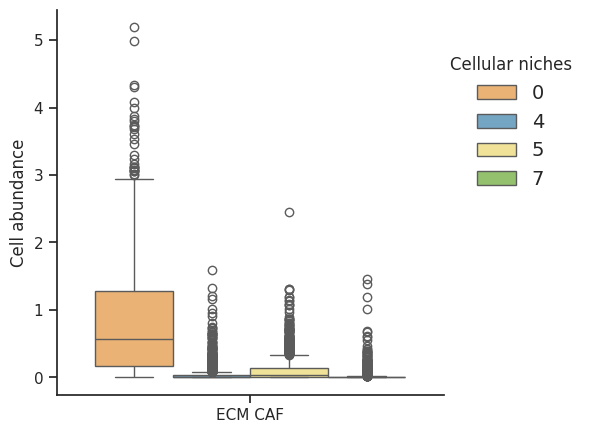

2178.123256301533 0.0
-- Pericyte


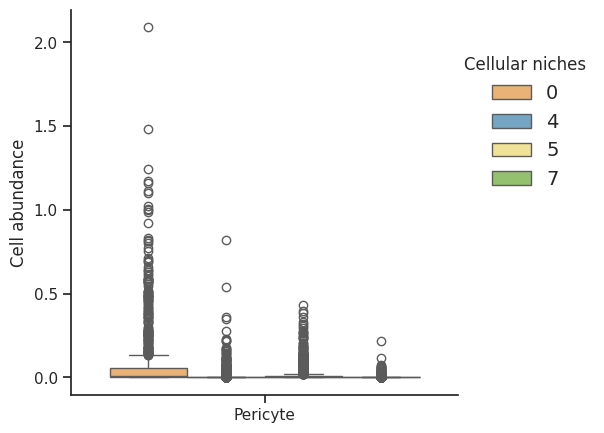

1996.270425369221 0.0
-- SPP1 Mac


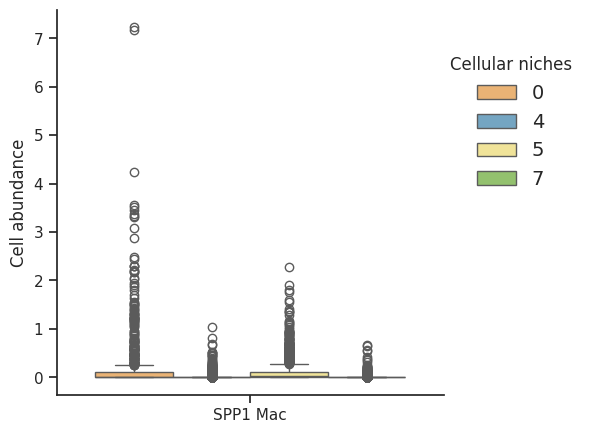

2418.004046214992 0.0
-- Neutrophil


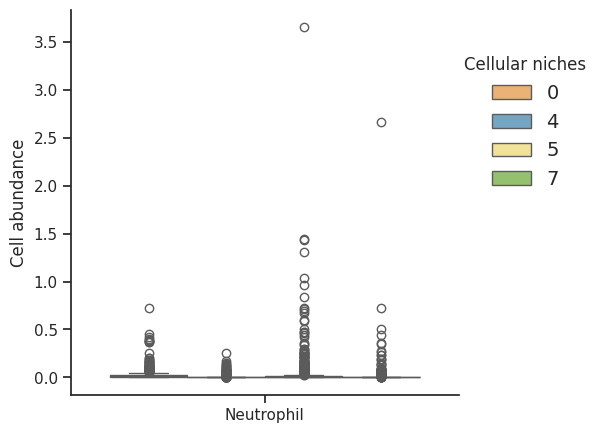

2197.1755336763163 0.0
-- Treg


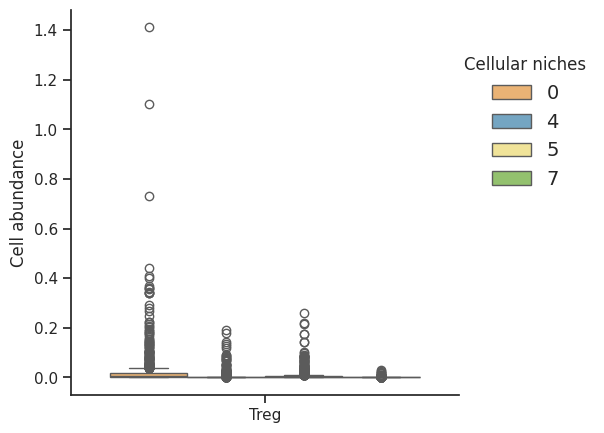

2372.554580497188 0.0
-- CD8 Tex


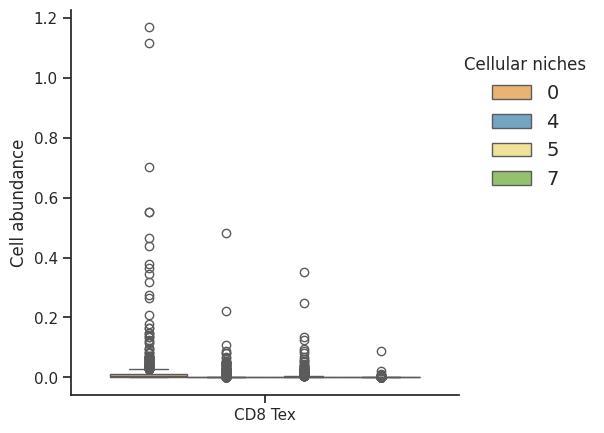

2463.5601517637406 0.0
-- IL1B Mac


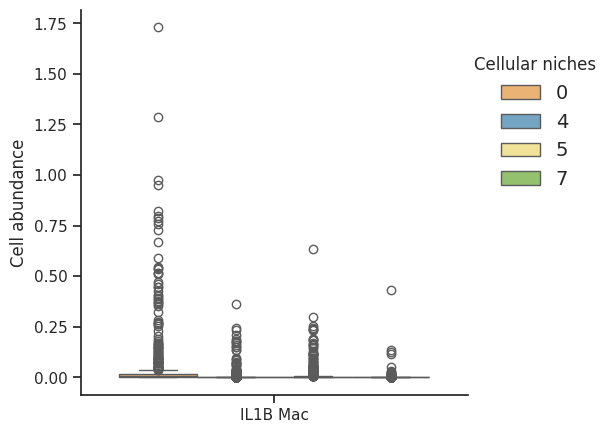

2364.7208485366755 0.0
-- NLRP3 Mac


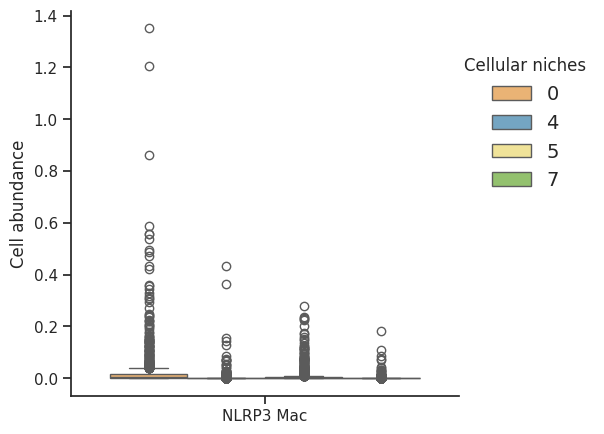

2486.667781124139 0.0


In [16]:
results_kruskal_test = dict()
for c in df_melt_subset['Celltype'].unique():
    print("--", c)
    tmp_df = df_melt_subset[df_melt_subset['Celltype']==c].copy()
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
    sns.boxplot(data=tmp_df,
            x="Celltype", 
            y="Cell abundance", 
            hue="segmentation_labels",
            palette=palette_subset,
            ax=ax,
            #flierprops={"marker": "o", "markerfacecolor": "None"}
           )
    ax.legend(
          bbox_to_anchor=(1.35, 0.9), 
          loc='upper right',
          fontsize=14,
          facecolor="white",
          edgecolor="white",
          ncol=1,
          borderaxespad=0.0,
          framealpha=0,
          frameon=False,
         )
    sns.despine()
    
        
    # Modify the legend to remove the frame
    legend = ax.get_legend()
    legend.set_title("Cellular niches")
    legend.set_frame_on(False)
    
    ax.set_xlabel("")
    #ax.set_ylim(bottom=0, top=1)
    
    
    plt.savefig(FIG2SAVE.joinpath(f"Boxplot_cell_abundance_cellular_neighbourhoods_subset_{c}.pdf"), 
            dpi=DPI, format="pdf", 
            bbox_inches="tight")
    plt.show()
    
    
    statistic, pval = stats.kruskal(tmp_df[tmp_df['segmentation_labels']==0]['Cell abundance'],
                                    tmp_df[tmp_df['segmentation_labels']==4]['Cell abundance'],
                                    tmp_df[tmp_df['segmentation_labels']==5]['Cell abundance'],
                                    tmp_df[tmp_df['segmentation_labels']==7]['Cell abundance'],
                  )
    print(statistic, pval)
    results_kruskal_test[c] = (statistic, pval)

-- REC


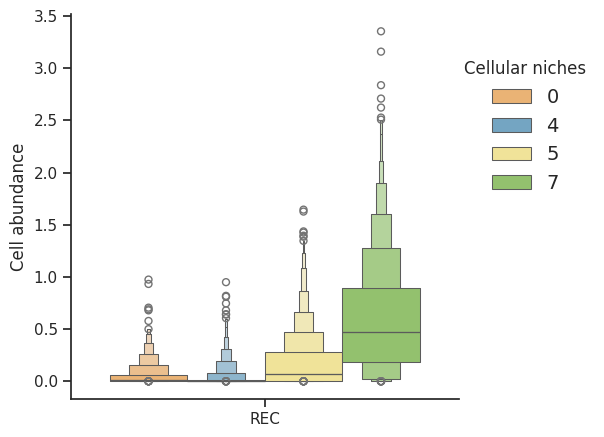

2645.721068734998 0.0
-- iREC


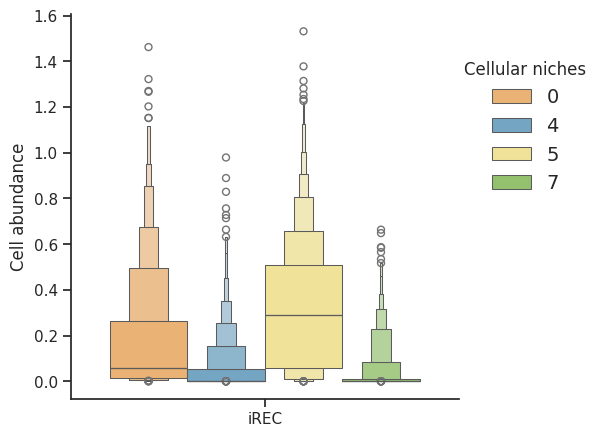

2261.924771864371 0.0
-- Stem


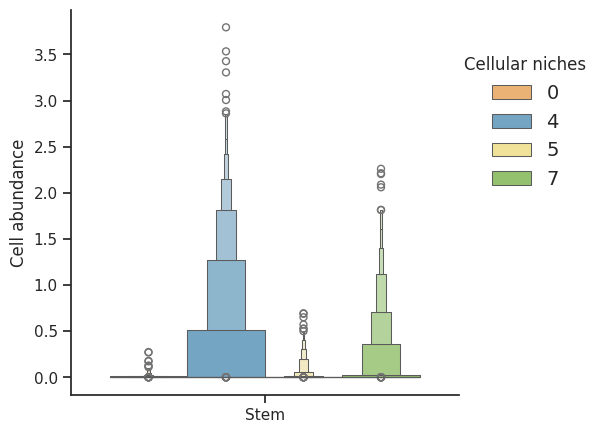

271.36296927504736 1.5652616450995965e-58
-- Stem NOTUM


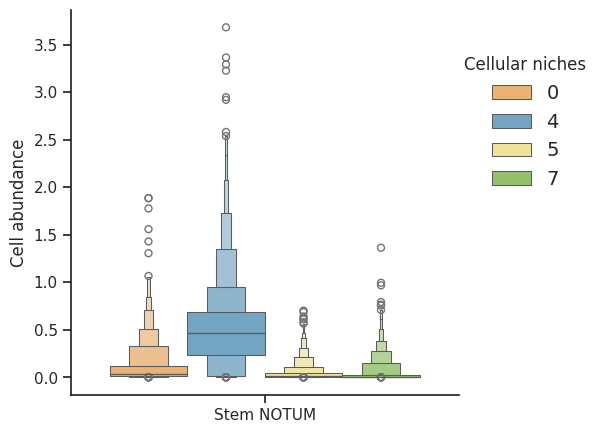

2452.0681152615107 0.0
-- Myofibroblast


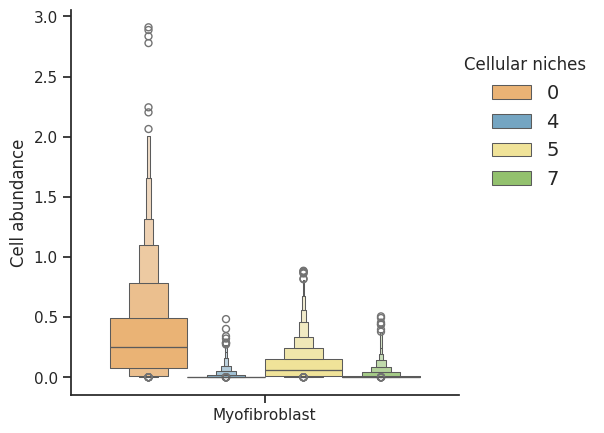

2768.9936648600487 0.0
-- ECM CAF


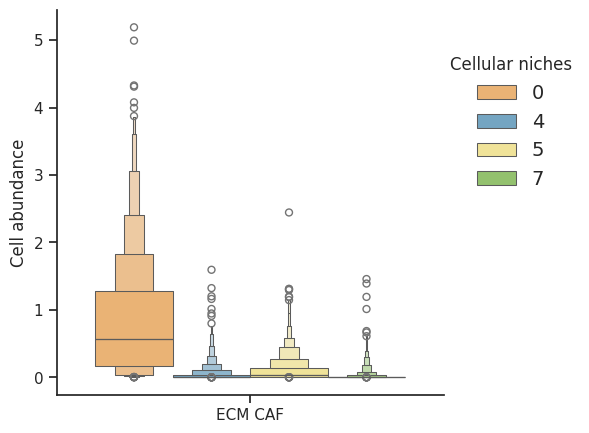

2178.123256301533 0.0
-- Pericyte


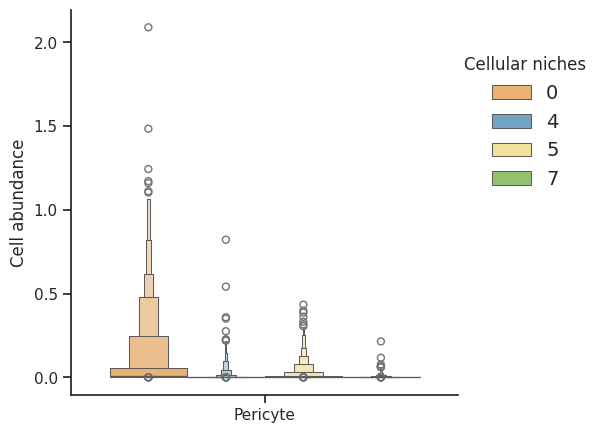

1996.270425369221 0.0
-- SPP1 Mac


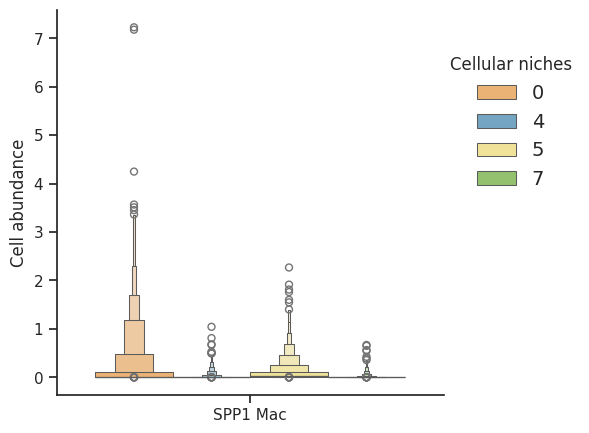

2418.004046214992 0.0
-- Neutrophil


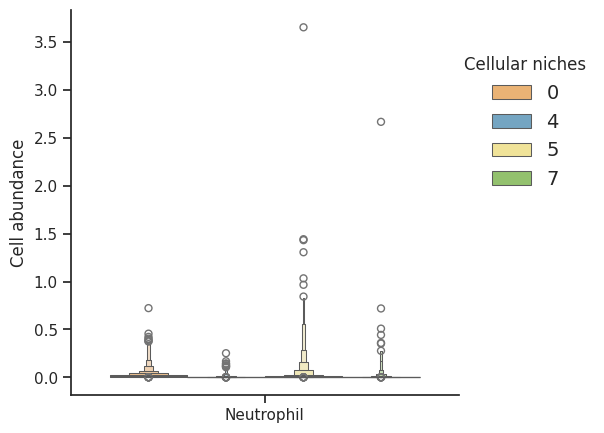

2197.1755336763163 0.0
-- Treg


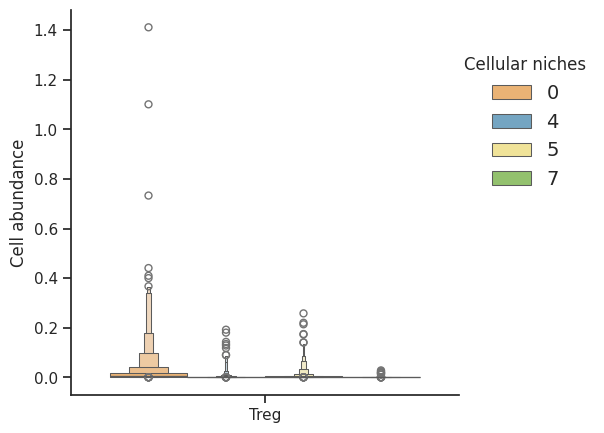

2372.554580497188 0.0
-- CD8 Tex


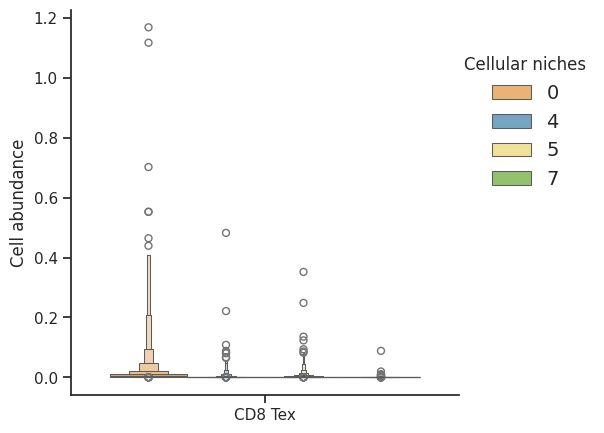

2463.5601517637406 0.0
-- IL1B Mac


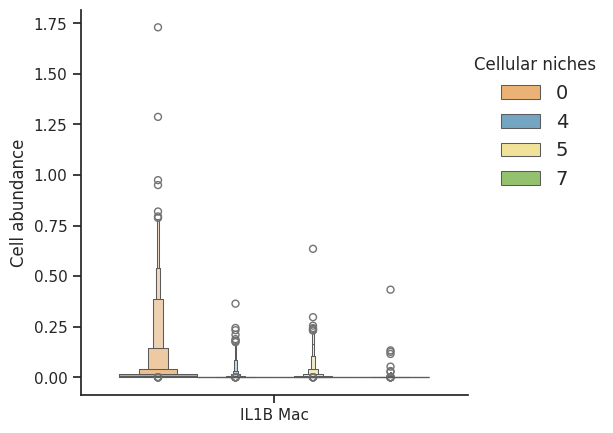

2364.7208485366755 0.0
-- NLRP3 Mac


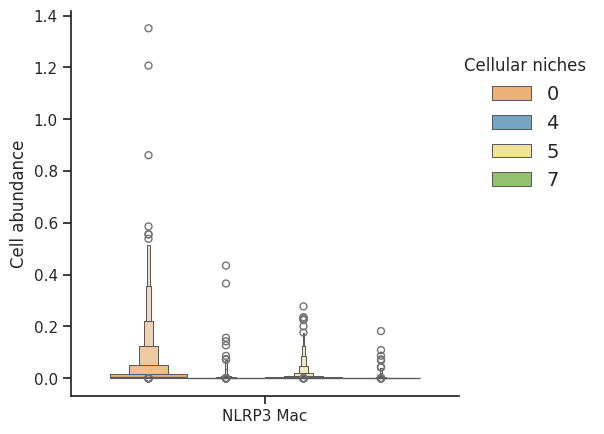

2486.667781124139 0.0


In [17]:
results_kruskal_test = dict()
for c in df_melt_subset['Celltype'].unique():
    print("--", c)
    tmp_df = df_melt_subset[df_melt_subset['Celltype']==c].copy()
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
    sns.boxenplot(data=tmp_df,
            x="Celltype", 
            y="Cell abundance", 
            hue="segmentation_labels",
            palette=palette_subset,
            ax=ax,
            #flierprops={"marker": "o", "markerfacecolor": "None"}
           )
    ax.legend(
          bbox_to_anchor=(1.35, 0.9), 
          loc='upper right',
          fontsize=14,
          facecolor="white",
          edgecolor="white",
          ncol=1,
          borderaxespad=0.0,
          framealpha=0,
          frameon=False,
         )
    sns.despine()
    
        
    # Modify the legend to remove the frame
    legend = ax.get_legend()
    legend.set_title("Cellular niches")
    legend.set_frame_on(False)
    
    ax.set_xlabel("")
    #ax.set_ylim(bottom=0, top=1)
    
    
    plt.savefig(FIG2SAVE.joinpath(f"Boxenplot_cell_abundance_cellular_neighbourhoods_subset_{c}.pdf"), 
            dpi=DPI, format="pdf", 
            bbox_inches="tight")
    plt.show()
    
    
    statistic, pval = stats.kruskal(tmp_df[tmp_df['segmentation_labels']==0]['Cell abundance'],
                                    tmp_df[tmp_df['segmentation_labels']==4]['Cell abundance'],
                                    tmp_df[tmp_df['segmentation_labels']==5]['Cell abundance'],
                                    tmp_df[tmp_df['segmentation_labels']==7]['Cell abundance'],
                  )
    print(statistic, pval)
    results_kruskal_test[c] = (statistic, pval)

In [18]:
results_dunn_test = dict()
for c in df_melt_subset.Celltype.unique():
    print("--", c)
    tmp_df = df_melt_subset[df_melt_subset['Celltype']==c].copy()
    
    data = [tmp_df[tmp_df['segmentation_labels']==0]['Cell abundance'].rename('0'),
            tmp_df[tmp_df['segmentation_labels']==4]['Cell abundance'].rename('4'),
            tmp_df[tmp_df['segmentation_labels']==5]['Cell abundance'].rename('5'),
            tmp_df[tmp_df['segmentation_labels']==7]['Cell abundance'].rename('7')
           ]
    
    # Using the posthoc_dunn() function
    p_values = scikit_posthocs.posthoc_dunn(data, p_adjust='fdr_by')
    print(p_values)
    results_dunn_test[c] = p_values

-- REC
               1              2              3              4
1   1.000000e+00   1.872352e-66   3.285696e-09  1.939972e-121
2   1.872352e-66   1.000000e+00  1.334992e-181   0.000000e+00
3   3.285696e-09  1.334992e-181   1.000000e+00   6.742041e-97
4  1.939972e-121   0.000000e+00   6.742041e-97   1.000000e+00
-- iREC
               1              2              3              4
1   1.000000e+00  1.223736e-103   1.792228e-15  6.939212e-152
2  1.223736e-103   1.000000e+00  1.067057e-294   1.537241e-11
3   1.792228e-15  1.067057e-294   1.000000e+00   0.000000e+00
4  6.939212e-152   1.537241e-11   0.000000e+00   1.000000e+00
-- Stem
              1             2             3             4
1  1.000000e+00  2.101882e-03  5.634495e-12  1.970765e-14
2  2.101882e-03  1.000000e+00  2.470805e-38  7.327682e-44
3  5.634495e-12  2.470805e-38  1.000000e+00  8.422125e-01
4  1.970765e-14  7.327682e-44  8.422125e-01  1.000000e+00
-- Stem NOTUM
              1              2              3        

In [19]:
FIG2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/cell2loc_spatialde2/concat_withWu2022/figures')